レポート課題1
問題2

In [1]:
#ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#モジュールのインポート
import cv2
import numpy as np
import matplotlib.pyplot as plt

#共通のディレクトリパス
common_path='/content/drive/MyDrive/img2025/image/'

画像サイズ:(512, 512, 3)
データ型:uint8


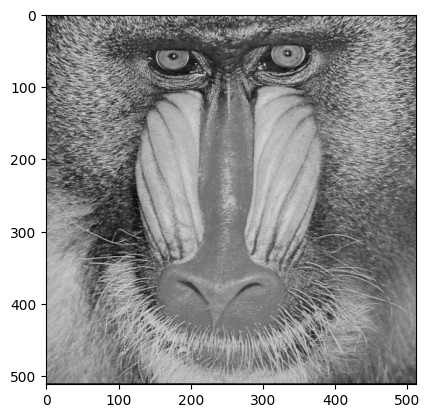

In [3]:
#画像を読み込む
img = cv2.imread(common_path + 'gray_image.png')

#画像サイズを確認
print(f'画像サイズ:{img.shape}')

#画像のデータ型を確認
print(f'データ型:{img.dtype}')

#BGRの順に並んでいるのでRGBの順に並べ替える
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#画像を表示
plt.imshow(img_rgb)
plt.show()

変換前後の画像を並べて表示する関数

In [4]:
def show_images(img1, img2, title1='Image 1', title2='Image 2', cmap='gray', vmin=0, vmax=255):

  #表示領域サイズの指定
  plt.figure(figsize=(10, 5))

  #変換前の画像を表示
  plt.subplot(1, 2, 1)
  plt.title(title1)
  plt.imshow(img1, cmap=cmap, vmin=vmin, vmax=vmax)
  plt.axis('off')

  #変換後の画像を表示
  plt.subplot(1, 2, 2)
  plt.title(title2)
  plt.imshow(img2, cmap=cmap, vmin=vmin, vmax=vmax)
  plt.axis('off')

  plt.tight_layout()
  plt.show()

ヒストグラム表示関数

In [5]:
# ヒストグラムを描画する関数
def plot_grayscale_histogram(image):

  # OpenCVでヒストグラムを計算
  hist = cv2.calcHist([image], [0], None, [256], [0, 256])

  # ヒストグラムを描画
  plt.figure(figsize=(10, 4))
  plt.plot(hist, color='black')
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')
  plt.xlim([0, 255])
  plt.grid(True)
  plt.tight_layout()
  plt.show()

（1）線形変換関数により濃度変換を行うプログラム

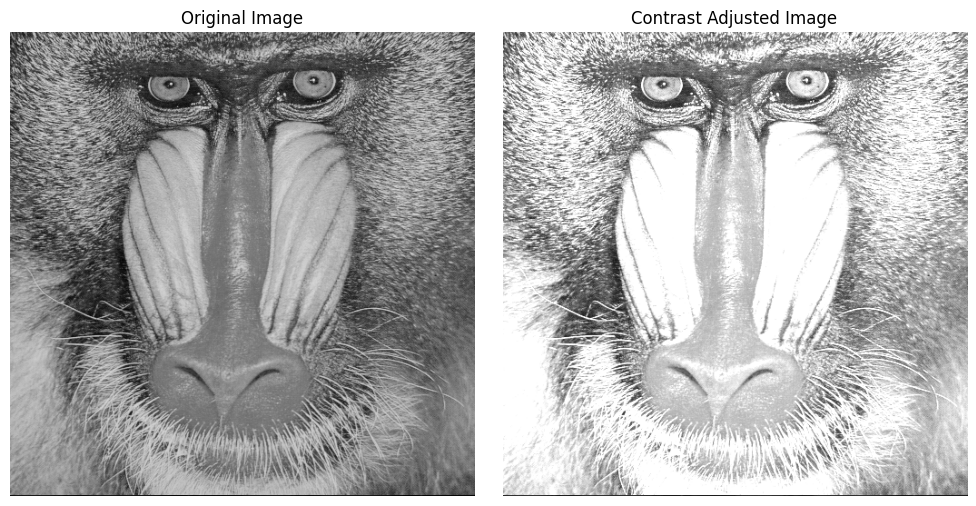

In [6]:
#画像を読み込む
gray_img = cv2.imread(common_path + 'gray_image.png')

#線形変換関数による濃度変換
adjusted_img= cv2.convertScaleAbs(gray_img, alpha=1.5, beta=15)

#結果を表示
show_images(gray_img, adjusted_img, 'Original Image', 'Contrast Adjusted Image')

元画像のヒストグラム

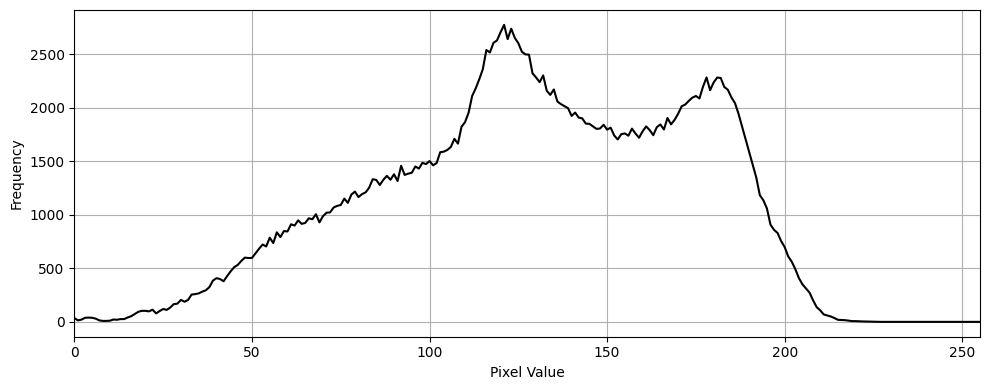

In [7]:
#元画像のヒストグラムを表示する
plot_grayscale_histogram(gray_img)

変換後の画像のヒストグラム

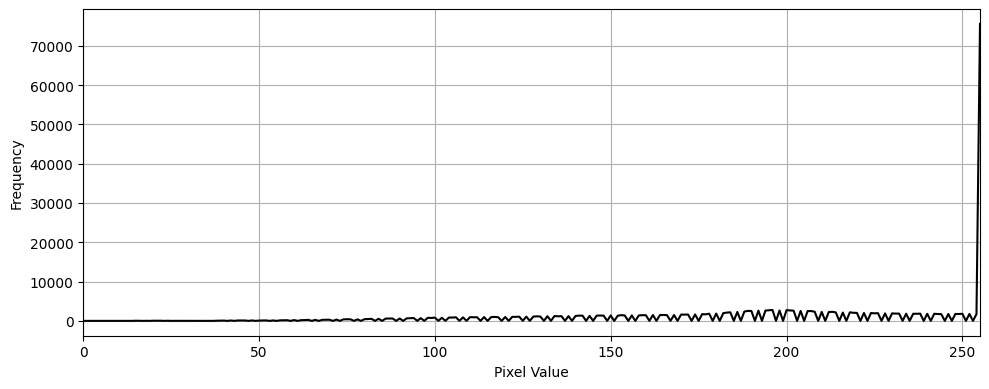

In [8]:
#変換後の画像のヒストグラムを表示する
plot_grayscale_histogram(adjusted_img)

(2)輝度反転

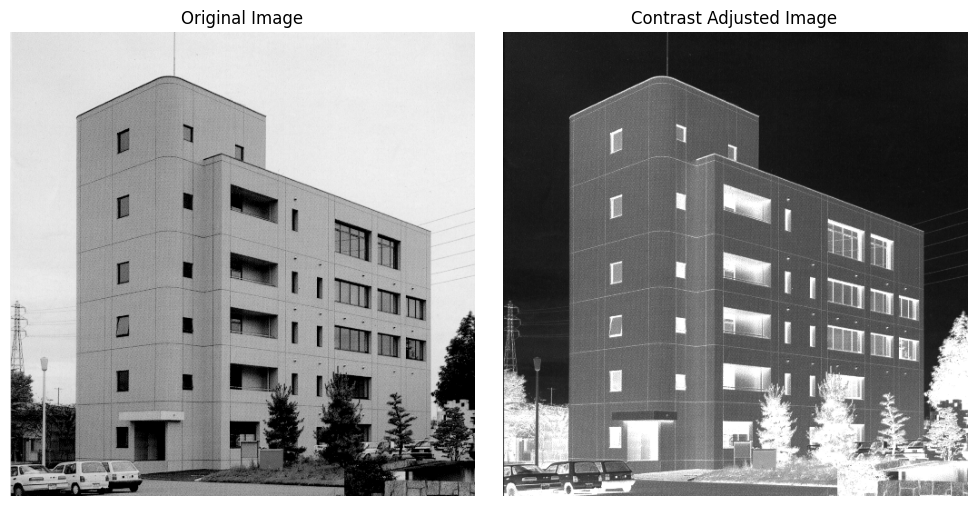

In [9]:
#画像を読み込む
gray_img = cv2.imread(common_path + 'building.png')

#線形変換関数による輝度変換
adjusted_img= cv2.convertScaleAbs(gray_img, alpha=-1, beta=255)

#結果を表示
show_images(gray_img, adjusted_img, 'Original Image', 'Contrast Adjusted Image')

元画像のヒストグラム

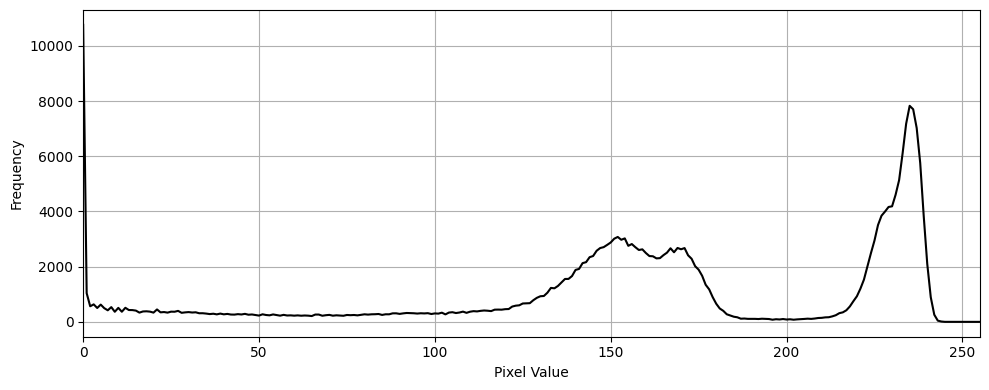

In [10]:
#元画像のヒストグラムを表示する
plot_grayscale_histogram(gray_img)

変換後の画像のヒストグラム

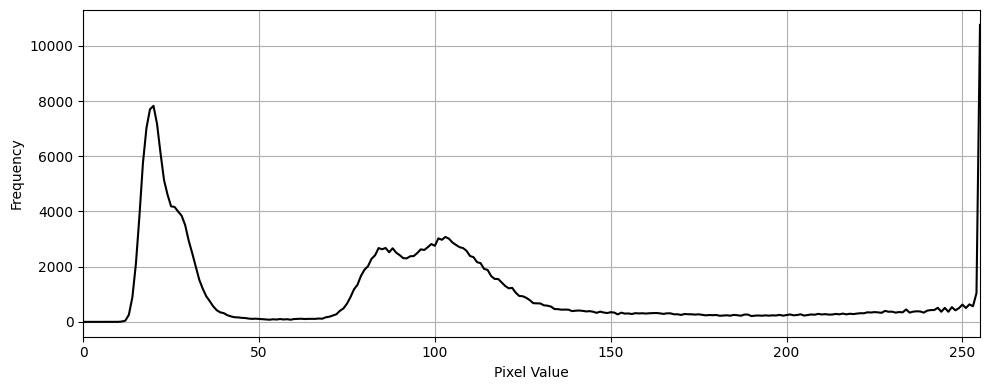

In [11]:
#変換後の画像のヒストグラムを表示する
plot_grayscale_histogram(adjusted_img)

(3)ノイズ除去

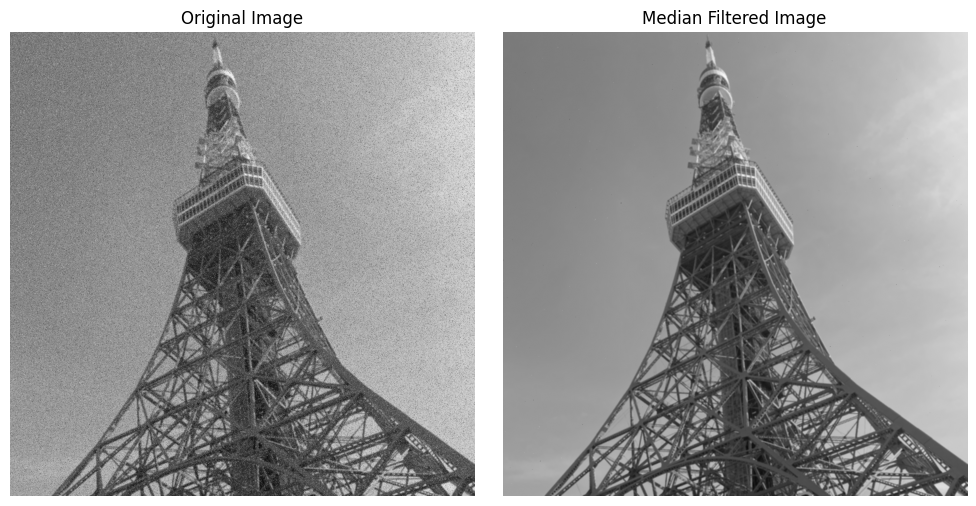

In [12]:
#画像の読み込み
noisy_img= cv2.imread(common_path+ 'noisy_image.png', cv2.IMREAD_GRAYSCALE)

#メディアンフィルタの適用
median_img = cv2.medianBlur(noisy_img, 3)

#実行結果の表示
show_images(noisy_img,median_img, 'Original Image','Median Filtered Image')

空の部分にゴマ塩ノイズが多く見られたことから、これを良好に除去できるメディアンフィルタを用いた。フィルタのサイズは大きくし過ぎると画像がぼやけ、また計算時間もかかるため、なるべく小さくしていった結果、フィルタサイズ3でも良好にノイズを除去できたため、この値を用いた。

（4）エッジ検出

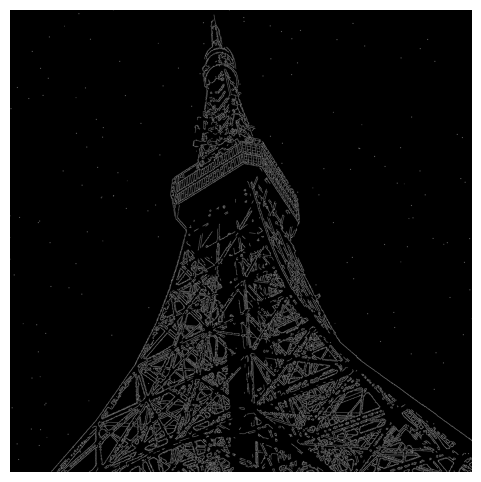

In [21]:
# @title しきい値の検討 {"run":"auto","vertical-output":true}
threshold1 = 93 # @param {"type":"slider","min":0,"max":360,"step":1}
threshold2 = 50 # @param {"type":"slider","min":0,"max":360,"step":1}

#Cannyアルゴリズムを使用してエッジ検出を行う
#threshold1,threshold2をしきい値の引数として設定する
canny_edges = cv2.Canny(median_img, threshold1,threshold2)

#実行結果の画像を表示する
plt.figure(figsize=(6,6))
plt.imshow(canny_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()